In [17]:
import numpy as np
import cv2 as cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [14]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [15]:
def fixColor(img):
    return (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

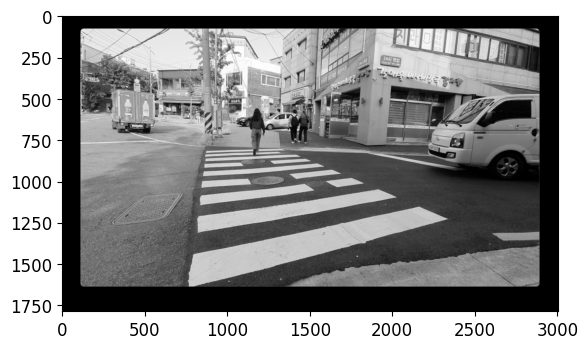

In [16]:
img = cv2.imread("test.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(fixColor(blurred))


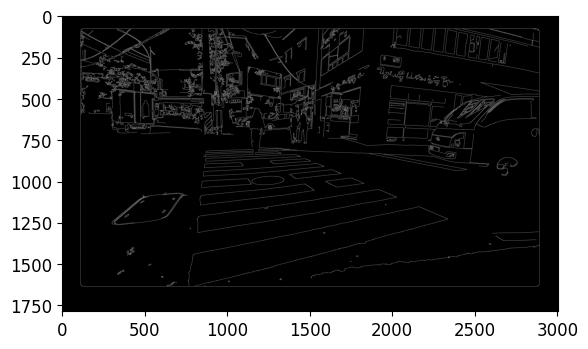

In [6]:
canny = cv2.Canny(blurred, 30, 300)
plt.imshow(fixColor(canny))

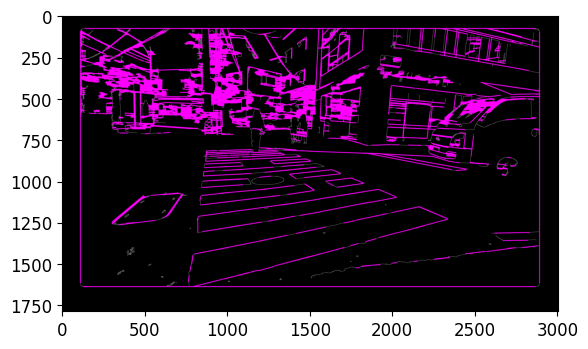

In [30]:
hough = cv2.HoughLinesP(canny, 1, math.pi / 180, threshold = 80, lines = None, minLineLength = 20, maxLineGap = 20)
edges = fixColor(canny)

if hough is not None:
    for i in range(0, len(hough)):
        l = hough[i][0]
        cv2.line(edges, (l[0], l[1]), (l[2], l[3]), (255, 0, 255), 3, cv2.LINE_AA)

plt.imshow(edges)

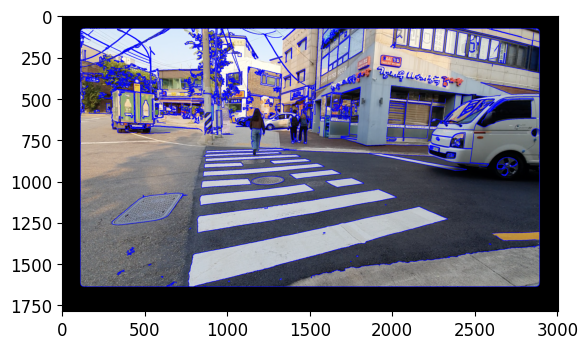

In [31]:
(contours, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result_img = img.copy()
cv2.drawContours(result_img, contours, -1, (255, 0, 0), 2)
plt.imshow(fixColor(result_img))